In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train = tf.reshape(x_train, (-1, 28*28))
x_test  = tf.reshape(x_test, (-1, 28*28))

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [2]:
# set seed
tf.random.set_seed(1234)

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [4]:
# optimizer and loss
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(x_train, y_train, batch_size=256,
                    validation_data=(x_test, y_test),
                    epochs=150, verbose=2)

Epoch 1/150
235/235 - 3s - loss: 6.9936 - sparse_categorical_accuracy: 0.7461 - val_loss: 1.5150 - val_sparse_categorical_accuracy: 0.7889 - 3s/epoch - 14ms/step
Epoch 2/150
235/235 - 2s - loss: 0.9830 - sparse_categorical_accuracy: 0.8010 - val_loss: 0.9565 - val_sparse_categorical_accuracy: 0.7743 - 2s/epoch - 9ms/step
Epoch 3/150
235/235 - 2s - loss: 0.6438 - sparse_categorical_accuracy: 0.8227 - val_loss: 0.6861 - val_sparse_categorical_accuracy: 0.8167 - 2s/epoch - 9ms/step
Epoch 4/150
235/235 - 2s - loss: 0.5384 - sparse_categorical_accuracy: 0.8351 - val_loss: 0.6767 - val_sparse_categorical_accuracy: 0.8110 - 2s/epoch - 8ms/step
Epoch 5/150
235/235 - 2s - loss: 0.4713 - sparse_categorical_accuracy: 0.8474 - val_loss: 0.5988 - val_sparse_categorical_accuracy: 0.8243 - 2s/epoch - 8ms/step
Epoch 6/150
235/235 - 2s - loss: 0.4292 - sparse_categorical_accuracy: 0.8550 - val_loss: 0.6017 - val_sparse_categorical_accuracy: 0.8300 - 2s/epoch - 7ms/step
Epoch 7/150
235/235 - 2s - loss: 

Epoch 52/150
235/235 - 2s - loss: 0.2268 - sparse_categorical_accuracy: 0.9142 - val_loss: 0.4769 - val_sparse_categorical_accuracy: 0.8621 - 2s/epoch - 9ms/step
Epoch 53/150
235/235 - 2s - loss: 0.2310 - sparse_categorical_accuracy: 0.9126 - val_loss: 0.4461 - val_sparse_categorical_accuracy: 0.8755 - 2s/epoch - 9ms/step
Epoch 54/150
235/235 - 2s - loss: 0.2245 - sparse_categorical_accuracy: 0.9151 - val_loss: 0.4552 - val_sparse_categorical_accuracy: 0.8738 - 2s/epoch - 9ms/step
Epoch 55/150
235/235 - 2s - loss: 0.2272 - sparse_categorical_accuracy: 0.9151 - val_loss: 0.4485 - val_sparse_categorical_accuracy: 0.8706 - 2s/epoch - 9ms/step
Epoch 56/150
235/235 - 2s - loss: 0.2207 - sparse_categorical_accuracy: 0.9164 - val_loss: 0.4843 - val_sparse_categorical_accuracy: 0.8580 - 2s/epoch - 9ms/step
Epoch 57/150
235/235 - 2s - loss: 0.2249 - sparse_categorical_accuracy: 0.9154 - val_loss: 0.4118 - val_sparse_categorical_accuracy: 0.8789 - 2s/epoch - 9ms/step
Epoch 58/150
235/235 - 2s - 

Epoch 103/150
235/235 - 2s - loss: 0.1632 - sparse_categorical_accuracy: 0.9386 - val_loss: 0.5867 - val_sparse_categorical_accuracy: 0.8691 - 2s/epoch - 9ms/step
Epoch 104/150
235/235 - 2s - loss: 0.1735 - sparse_categorical_accuracy: 0.9354 - val_loss: 0.5519 - val_sparse_categorical_accuracy: 0.8789 - 2s/epoch - 9ms/step
Epoch 105/150
235/235 - 2s - loss: 0.1837 - sparse_categorical_accuracy: 0.9330 - val_loss: 0.5534 - val_sparse_categorical_accuracy: 0.8788 - 2s/epoch - 9ms/step
Epoch 106/150
235/235 - 2s - loss: 0.1668 - sparse_categorical_accuracy: 0.9374 - val_loss: 0.5762 - val_sparse_categorical_accuracy: 0.8787 - 2s/epoch - 9ms/step
Epoch 107/150
235/235 - 2s - loss: 0.1644 - sparse_categorical_accuracy: 0.9378 - val_loss: 0.5799 - val_sparse_categorical_accuracy: 0.8771 - 2s/epoch - 9ms/step
Epoch 108/150
235/235 - 2s - loss: 0.1648 - sparse_categorical_accuracy: 0.9387 - val_loss: 0.5999 - val_sparse_categorical_accuracy: 0.8758 - 2s/epoch - 9ms/step
Epoch 109/150
235/235 

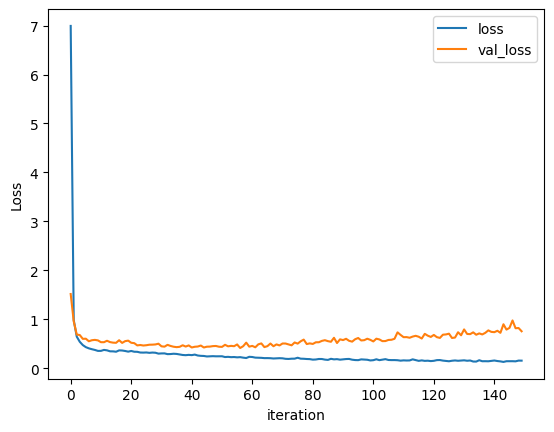

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

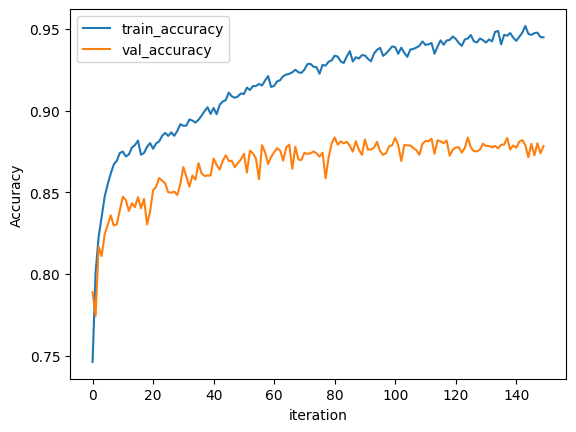

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [7]:
import matplotlib.pyplot as plt
%matplotlib qt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()